In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [4]:
data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


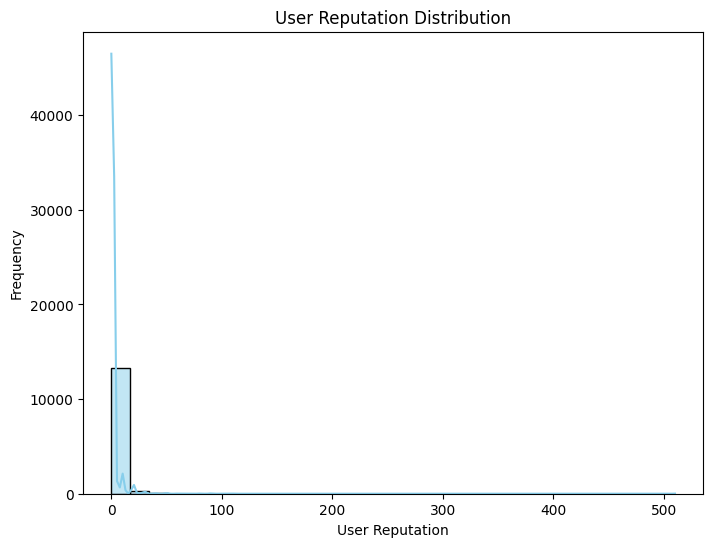

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data['UserReputation'], bins=30, kde=True, color='skyblue')
plt.title('User Reputation Distribution')
plt.xlabel('User Reputation')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

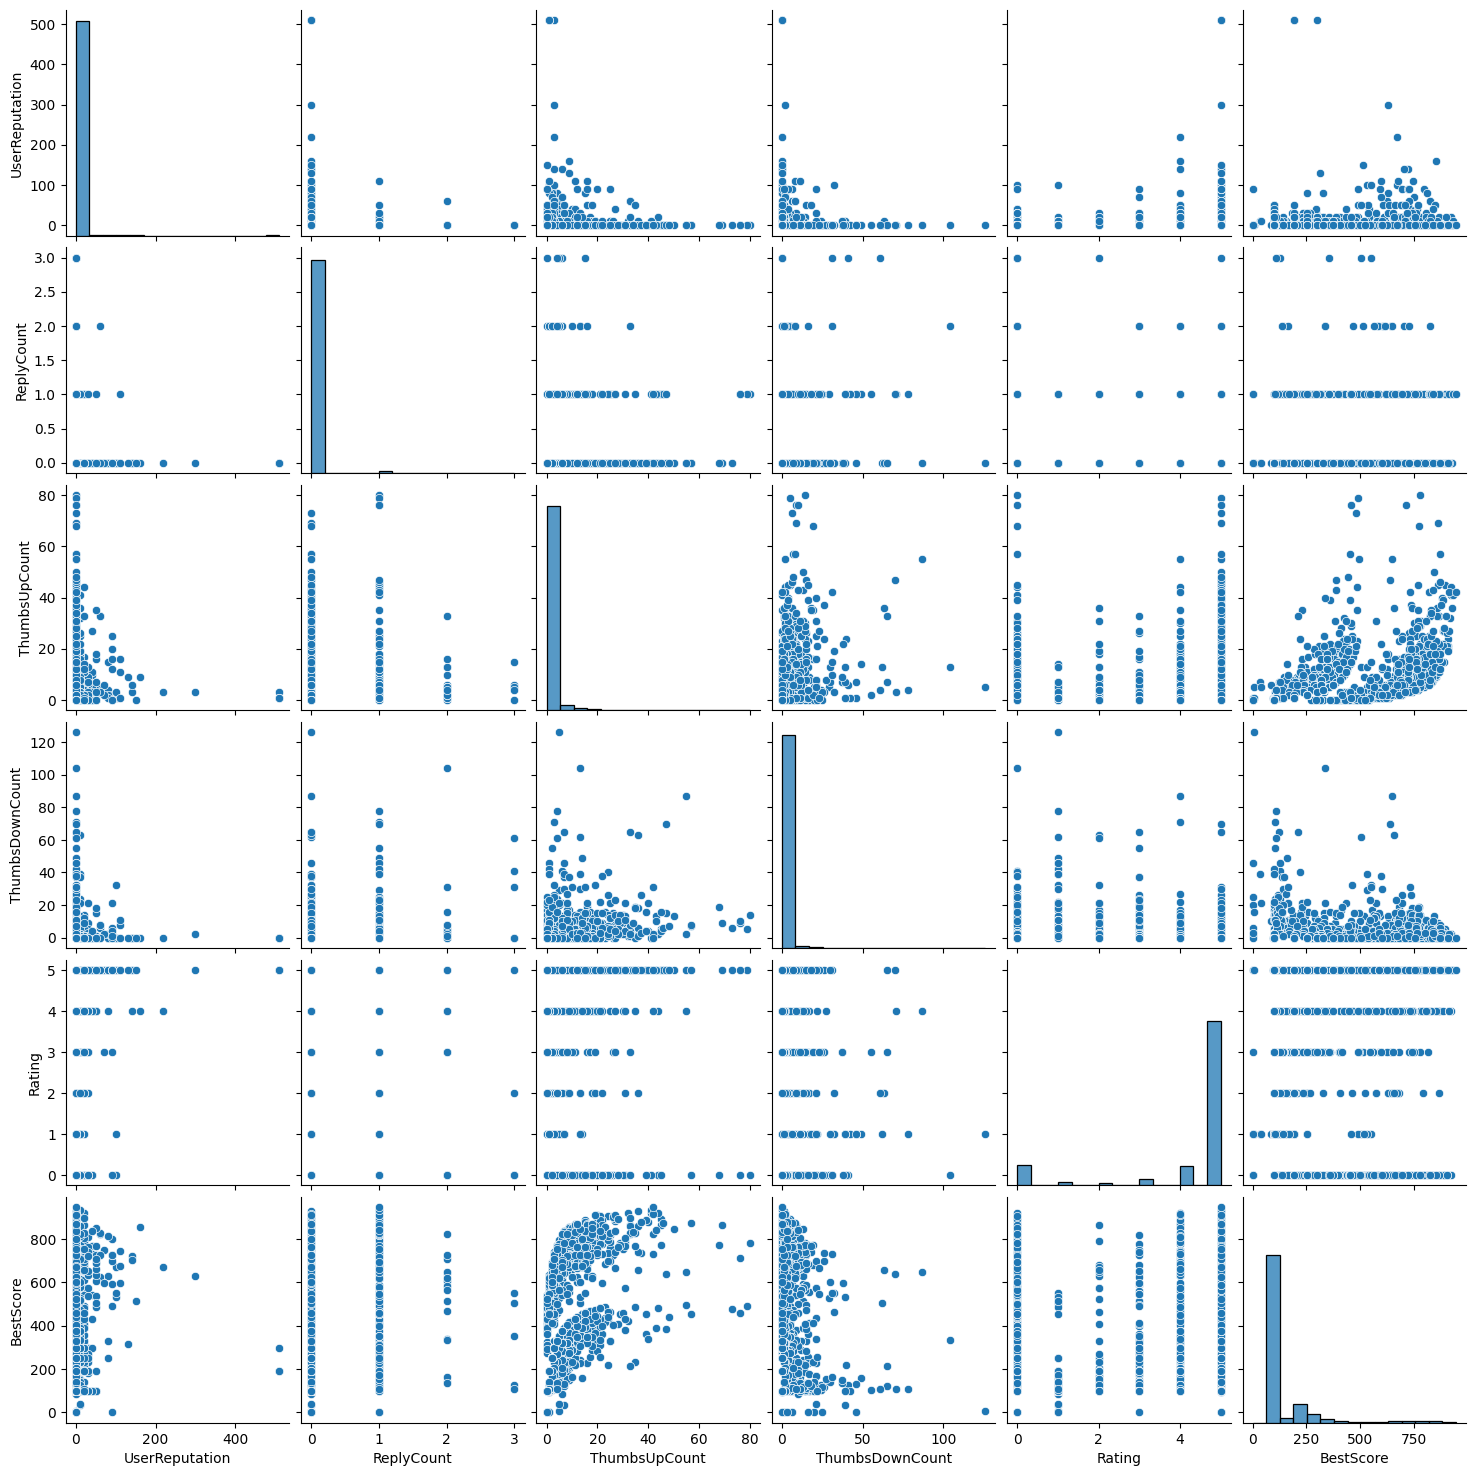

In [6]:
sns.pairplot(data[['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']])
plt.show()

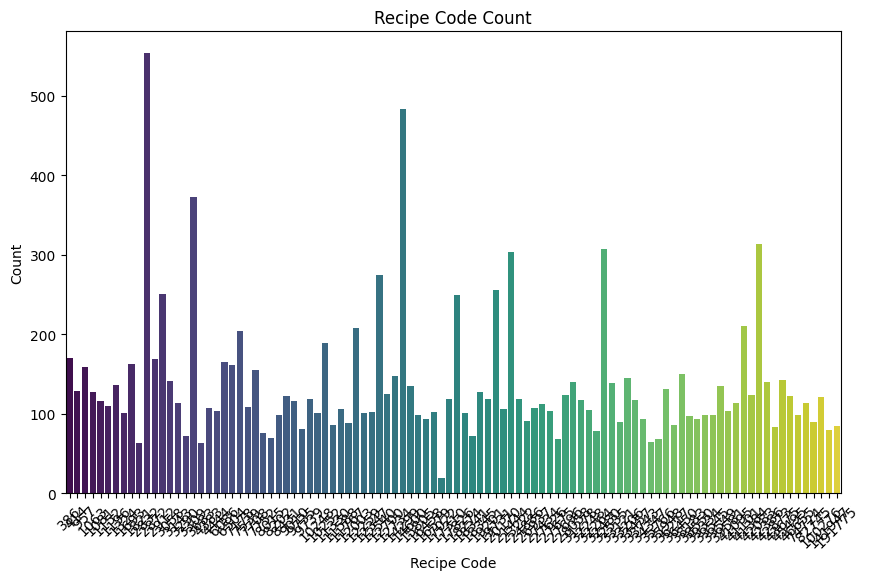

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RecipeCode', data=data, palette='viridis')
plt.title('Recipe Code Count')
plt.xlabel('Recipe Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

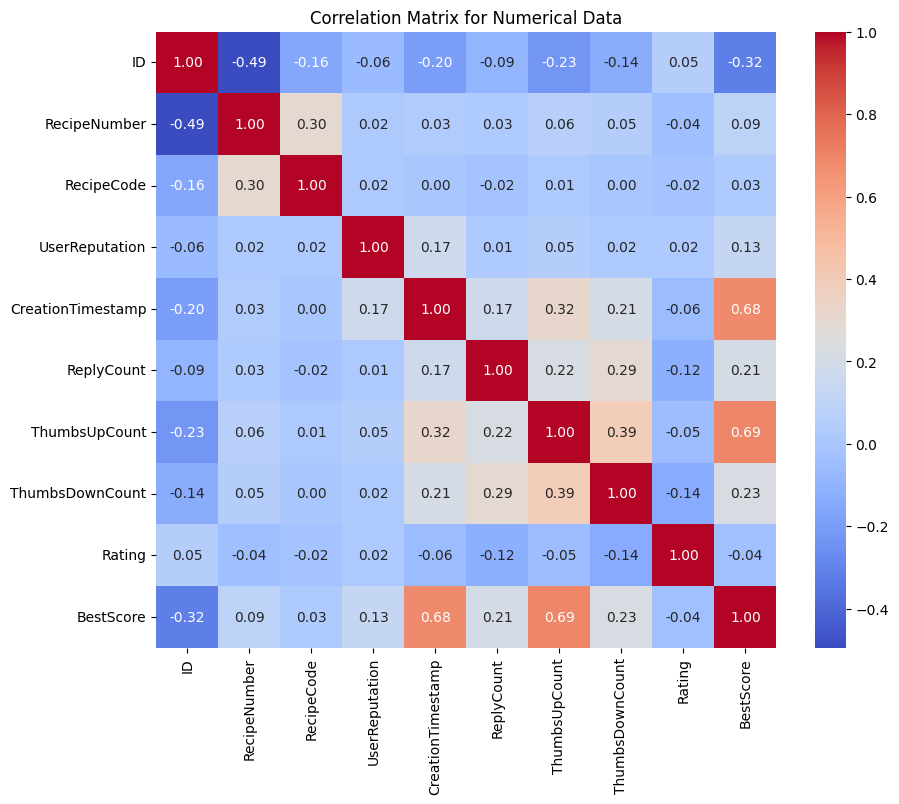

In [8]:
numerical_df = data.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Data')
plt.show()

In [9]:
data["Recipe_Review"]

0        great recipe! I have made them just as written...
1        This is an easy and quick recipe that is great...
2        I think I was looking for something extra spec...
3        This is our favorite grilled chicken recipe.  ...
4        Great basic recipe. I added 2 teaspoons Tuscan...
                               ...                        
13631    Delicious!! Very easy to make! One minor chang...
13632    I made this pie for my family and they loved i...
13633                                          Very tasty!
13634    I have made this numerous times.  It&#39;s so ...
13635    Super. I added 1/2 lb chopped bacon to mine. H...
Name: Recipe_Review, Length: 13636, dtype: object

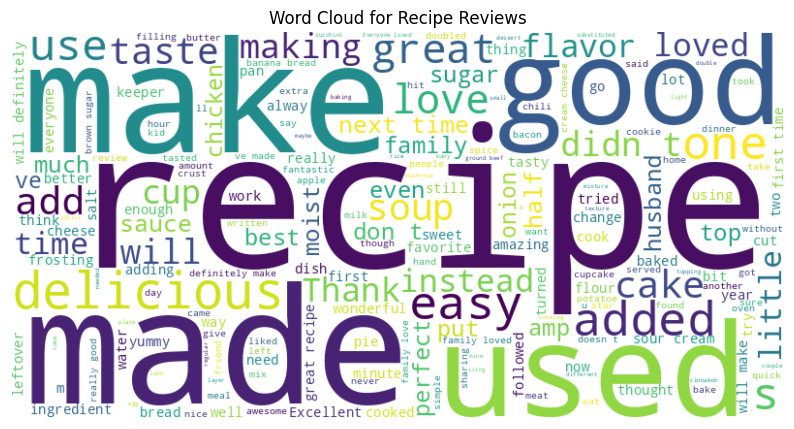

In [10]:
from wordcloud import WordCloud
data['Recipe_Review'] = data['Recipe_Review'].fillna('')
reviews_text = ' '.join(data['Recipe_Review'].astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Recipe Reviews')
plt.axis('off')
plt.show()

In [11]:
# Drop irrelevant columns for now (you might need to revisit this based on your specific needs)
irrelevent_columns = ['ID','RecipeNumber','RecipeName','RecipeCode','UserName','UserReputation','CommentID','UserID','CreationTimestamp']
data = data.drop(irrelevent_columns,axis = 1)
print(data.head())
test = test.drop(irrelevent_columns,axis = 1)
print(test.head())

   ReplyCount  ThumbsUpCount  ThumbsDownCount  Rating  BestScore  \
0           0              0                0       5        100   
1           0              0                1       5        100   
2           0              0                0       3        100   
3           0              0                0       5        100   
4           0              0                0       4        100   

                                       Recipe_Review  
0  great recipe! I have made them just as written...  
1  This is an easy and quick recipe that is great...  
2  I think I was looking for something extra spec...  
3  This is our favorite grilled chicken recipe.  ...  
4  Great basic recipe. I added 2 teaspoons Tuscan...  
   ReplyCount  ThumbsUpCount  ThumbsDownCount  BestScore  \
0           0              0                0        100   
1           0              0                1        100   
2           0              0                0        100   
3           0        

In [12]:
data = data.dropna()
test = test.dropna()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Define features and target
X = data.drop(columns=['Rating'])
y = data['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
textual_features = ['Recipe_Review']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

textual_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('text', textual_transformer, 'Recipe_Review')
    ])

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

classifiers = {
    'Ridge Classifier': RidgeClassifier(random_state=42),
    "Logistic Regression" : LogisticRegression(max_iter=10000, random_state=42),
    'LightGBM' : LGBMClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
}

stacking_estimators = [(name, clf) for name, clf in classifiers.items()]
stacking_classifier = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression())
classifiers['Stacking Classifier'] = stacking_classifier


for name, clf in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Ridge Classifier Accuracy: 0.7705
Logistic Regression Accuracy: 0.7676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69246
[LightGBM] [Info] Number of data points in the train set: 10908, number of used features: 1393
[LightGBM] [Info] Start training from score -2.374608
[LightGBM] [Info] Start training from score -4.167353
[LightGBM] [Info] Start training from score -4.355609
[LightGBM] [Info] Start training from score -3.651805
[LightGBM] [Info] Start training from score -2.398537
[LightGBM] [Info] Start training from score -0.272037
LightGBM Accuracy: 0.7705
Decision Tree Accuracy: 0.6738
Random Forest Accuracy: 0.7606
SVC Accuracy: 0.7566
KNN Accuracy: 0.7515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108548 seconds.
You can set `fo

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier Accuracy: 0.7823


In [15]:
y_pred = pipeline.predict(test)

predictions_df = pd.DataFrame({'Rating': y_pred}, index=range(1, len(y_pred) + 1))
predictions_df.index.name = 'ID'
predictions_df.to_csv('Submission.csv')
